In [52]:
# Telecom X - Customer Churn Analysis

# ✅ ETL Pipeline: Extract, Transform, Load
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



In [53]:
# Step 1: Extract
url = "https://raw.githubusercontent.com/ingridcristh/challenge2-data-science-LATAM/main/TelecomX_Data.json"
df = pd.read_json(url)

In [54]:
# Expandir columnas anidadas
cols_to_normalize = ['customer', 'phone', 'internet', 'account']
for col in cols_to_normalize:
    if col in df.columns:
        expanded = pd.json_normalize(df[col])
        expanded.columns = [f"{col}_{subcol}" for subcol in expanded.columns]
        df = df.drop(columns=col).join(expanded)

In [55]:
# Step 2: Initial Exploration
df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7267 non-null   object 
 1   Churn                      7267 non-null   object 
 2   customer_gender            7267 non-null   object 
 3   customer_SeniorCitizen     7267 non-null   int64  
 4   customer_Partner           7267 non-null   object 
 5   customer_Dependents        7267 non-null   object 
 6   customer_tenure            7267 non-null   int64  
 7   phone_PhoneService         7267 non-null   object 
 8   phone_MultipleLines        7267 non-null   object 
 9   internet_InternetService   7267 non-null   object 
 10  internet_OnlineSecurity    7267 non-null   object 
 11  internet_OnlineBackup      7267 non-null   object 
 12  internet_DeviceProtection  7267 non-null   object 
 13  internet_TechSupport       7267 non-null   objec

In [56]:
df.describe(include="all")

,customerID,Churn,customer_gender,customer_SeniorCitizen,customer_Partner,customer_Dependents,customer_tenure,phone_PhoneService,phone_MultipleLines,internet_InternetService,...,internet_OnlineBackup,internet_DeviceProtection,internet_TechSupport,internet_StreamingTV,internet_StreamingMovies,account_Contract,account_PaperlessBilling,account_PaymentMethod,account_Charges.Monthly,account_Charges.Total
count,7267,7267,7267,7267.000000,7267,7267,7267.000000,7267,7267,7267,...,7267,7267,7267,7267,7267,7267,7267,7267,7267.000000,7267
unique,7267,3,2,NaN,2,2,NaN,2,3,3,...,3,3,3,3,3,3,2,4,NaN,6531
top,9995-HOTOH,No,Male,NaN,No,No,NaN,Yes,No,Fiber optic,...,No,No,No,No,No,Month-to-month,Yes,Electronic check,NaN,20.2
freq,1,5174,3675,NaN,3749,5086,NaN,6560,3495,3198,...,3182,3195,3582,2896,2870,4005,4311,2445,NaN,11
mean,NaN,NaN,NaN,0.162653,NaN,NaN,32.346498,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,64.720098,NaN
std,NaN,NaN,NaN,0.369074,NaN,NaN,24.571773,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30.129572,NaN
min,NaN,NaN,NaN,0.000000,NaN,NaN,0.000000,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.250000,NaN
25%,NaN,NaN,NaN,0.000000,NaN,NaN,9.000000,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35.425000,NaN
50%,NaN,NaN,NaN,0.000000,NaN,NaN,29.000000,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,70.300000,NaN
75%,NaN,NaN,NaN,0.000000,NaN,NaN,55.000000,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,89.875000,NaN


In [57]:
# Ver columnas numéricas
num_cols = df.select_dtypes(include=["float64", "int64"]).columns
print("Columnas numéricas:", list(num_cols))

# Ver columnas categóricas
cat_cols = df.select_dtypes(include=["object", "bool"]).columns
print("Columnas categóricas:", list(cat_cols))

# Descripción numérica
df[num_cols].describe().T

# Descripción categórica
df[cat_cols].describe(include="all").T


Columnas numéricas: ['customer_SeniorCitizen', 'customer_tenure', 'account_Charges.Monthly']
Columnas categóricas: ['customerID', 'Churn', 'customer_gender', 'customer_Partner', 'customer_Dependents', 'phone_PhoneService', 'phone_MultipleLines', 'internet_InternetService', 'internet_OnlineSecurity', 'internet_OnlineBackup', 'internet_DeviceProtection', 'internet_TechSupport', 'internet_StreamingTV', 'internet_StreamingMovies', 'account_Contract', 'account_PaperlessBilling', 'account_PaymentMethod', 'account_Charges.Total']


,count,unique,top,freq
customerID,7267,7267,9995-HOTOH,1
Churn,7267,3,No,5174
customer_gender,7267,2,Male,3675
customer_Partner,7267,2,No,3749
customer_Dependents,7267,2,No,5086
phone_PhoneService,7267,2,Yes,6560
phone_MultipleLines,7267,3,No,3495
internet_InternetService,7267,3,Fiber optic,3198
internet_OnlineSecurity,7267,3,No,3608
internet_OnlineBackup,7267,3,No,3182


In [58]:
# Step 3: Transform
# Check for nulls
missing = df.isnull().sum()

In [59]:
missing[missing > 0]

,0


In [60]:
# Standardize column names
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')

In [67]:
# Convert binary columns with "Yes"/"No" to 1/0
object_cols = df.select_dtypes(include='object')
binary_cols = object_cols.columns[object_cols.isin(['Yes', 'No']).any(axis=0)]
for col in binary_cols:
    df[col] = df[col].map({'Yes': 1, 'No': 0})

In [69]:
# Reemplazar cadenas vacías por NaN y luego convertir a binario
df['churn'] = df['churn'].replace('', np.nan)
df['churn'] = df['churn'].map({'Yes': 1, 'No': 0})

In [72]:
# Eliminar filas con valores NaN en la columna 'churn'
df = df.dropna(subset=['churn'])

# Verificar que se eliminaron correctamente
df['churn'].unique()

array([0.])

In [70]:
# Convert 'churn' to binary if not already
# Check unique values before mapping to identify potential issues
print("Unique values in 'churn' before mapping:", df['churn'].unique())
df['churn'] = df['churn'].map({'Yes': 1, 'No': 0})
# Fill any remaining NaNs in churn with a value, perhaps 0 assuming non-Yes/No are non-churn or investigate further
df['churn'].fillna(0, inplace=True)
print("Unique values in 'churn' after mapping and filling NaNs:", df['churn'].unique())

Unique values in 'churn' before mapping: [nan]
Unique values in 'churn' after mapping and filling NaNs: [0.]


/tmp/ipython-input-574382704.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['churn'].fillna(0, inplace=True)


In [65]:
# Fill missing values if any
df.fillna(method='ffill', inplace=True)

/tmp/ipython-input-3726532194.py:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)


In [66]:
# Step 4: Load - Data ready for analysis
df.to_csv("TelecomX_Cleaned.csv", index=False)

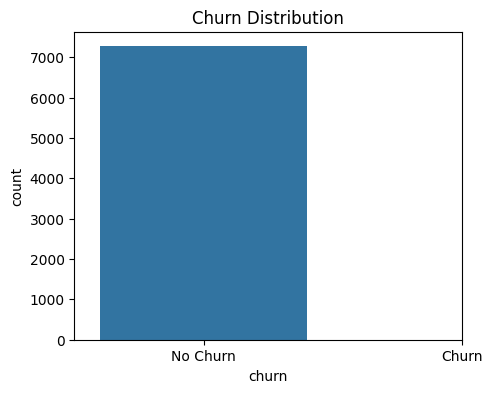

In [77]:
# ✅ Exploratory Data Analysis (EDA)

# Churn distribution
plt.figure(figsize=(5, 4))
sns.countplot(x='churn', data=df)
plt.title("Churn Distribution")
plt.xticks([0, 1], ['No Churn', 'Churn'])
plt.show()

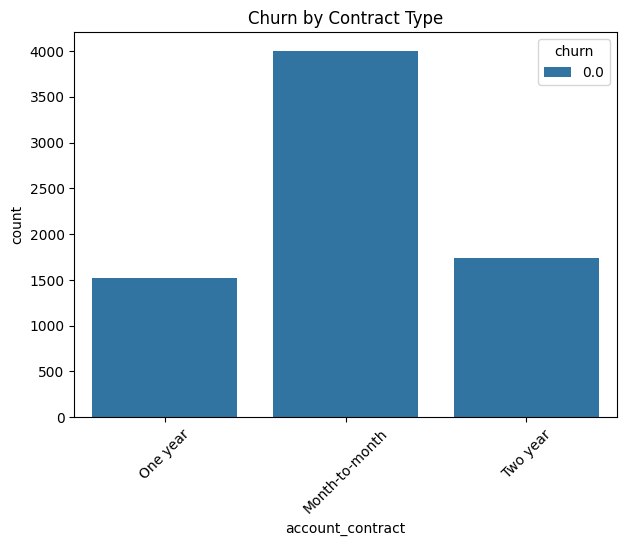

In [80]:
# Churn by contract type

# Use the normalized 'account_Contract' column
plt.figure(figsize=(7, 5))
sns.countplot(x='account_contract', hue='churn', data=df)
plt.title("Churn by Contract Type")
plt.xticks(rotation=45)
plt.show()

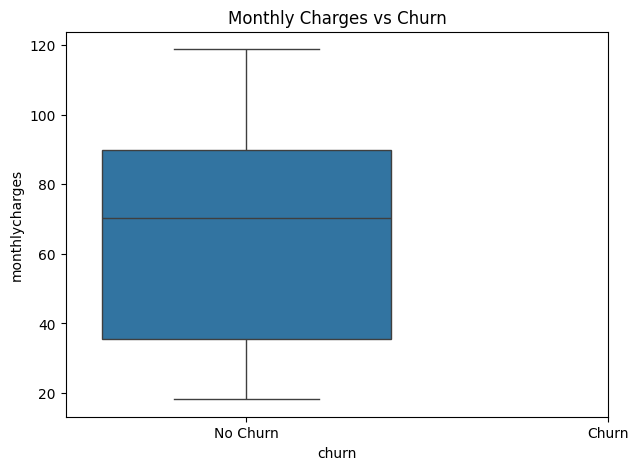

In [75]:
# Monthly Charges vs Churn

# Use the normalized column and convert to numeric
df['monthlycharges'] = pd.to_numeric(df['account_charges.monthly'], errors='coerce')
df['monthlycharges'] = df['monthlycharges'].fillna(0) # Fill NaNs with 0

plt.figure(figsize=(7, 5))
sns.boxplot(x='churn', y='monthlycharges', data=df)
plt.title("Monthly Charges vs Churn")
plt.xticks([0, 1], ['No Churn', 'Churn'])
plt.show()

In [83]:
df.columns.tolist()

['customerid',
 'churn',
 'customer_gender',
 'customer_seniorcitizen',
 'customer_partner',
 'customer_dependents',
 'customer_tenure',
 'phone_phoneservice',
 'phone_multiplelines',
 'internet_internetservice',
 'internet_onlinesecurity',
 'internet_onlinebackup',
 'internet_deviceprotection',
 'internet_techsupport',
 'internet_streamingtv',
 'internet_streamingmovies',
 'account_contract',
 'account_paperlessbilling',
 'account_paymentmethod',
 'account_charges.monthly',
 'account_charges.total',
 'monthlycharges',
 'totalcharges']

In [85]:
display(df['churn'].dtype)
display(df['churn'].unique())
display(df['monthlycharges'].dtype)
display(df['monthlycharges'].unique())

dtype('float64')

array([0.])

dtype('float64')

array([65.6 , 59.9 , 73.9 , ..., 91.75, 68.8 , 67.85])

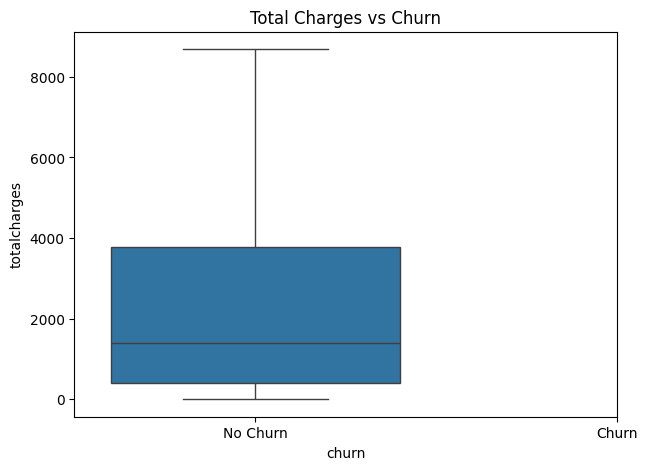

In [86]:
# Total Charges vs Churn

# Use the normalized column and convert to numeric
df['totalcharges'] = pd.to_numeric(df['account_charges.total'], errors='coerce')
df['totalcharges'] = df['totalcharges'].fillna(0) # Fill NaNs with 0

plt.figure(figsize=(7, 5))
sns.boxplot(x='churn', y='totalcharges', data=df)
plt.title("Total Charges vs Churn")
plt.xticks([0, 1], ['No Churn', 'Churn'])
plt.show()

In [87]:
display(df['churn'].dtype)
display(df['churn'].unique())
display(df['totalcharges'].dtype)
display(df['totalcharges'].unique())

dtype('float64')

array([0.])

dtype('float64')

array([ 593.3 ,  542.4 ,  280.85, ...,  742.9 , 4627.65, 3707.6 ])

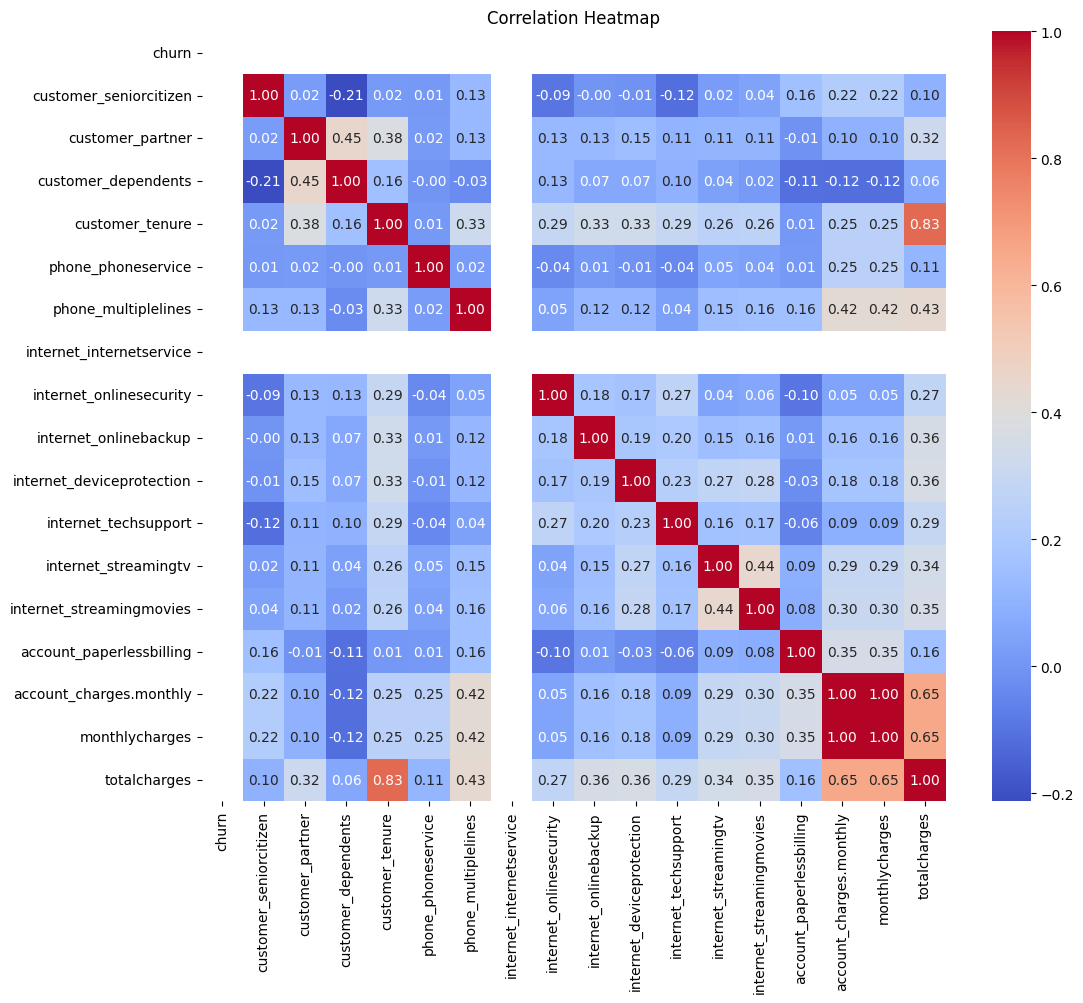

In [88]:
# Correlation heatmap
plt.figure(figsize=(12, 10))
corr = df.corr(numeric_only=True)
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()


In [89]:
# Ensure visual style
sns.set(style="whitegrid", palette="muted")

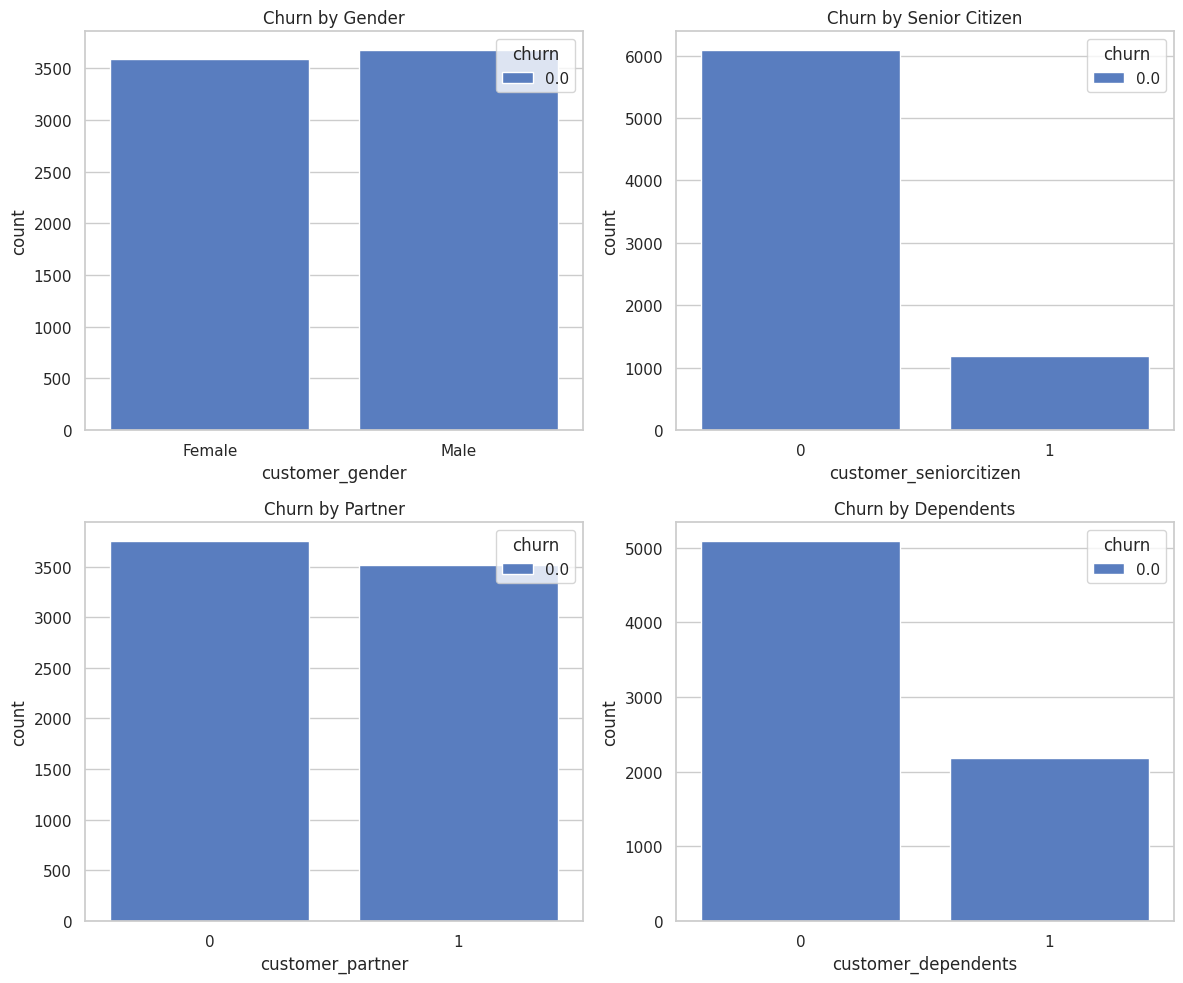

In [101]:
# 1. Demographic Analysis: Churn by Gender, SeniorCitizen, Partner, Dependents
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
sns.countplot(x="customer_gender", hue="churn", data=df, ax=axes[0,0])
axes[0,0].set_title("Churn by Gender")

sns.countplot(x="customer_seniorcitizen", hue="churn", data=df, ax=axes[0,1])
axes[0,1].set_title("Churn by Senior Citizen")

sns.countplot(x="customer_partner", hue="churn", data=df, ax=axes[1,0])
axes[1,0].set_title("Churn by Partner")

sns.countplot(x="customer_dependents", hue="churn", data=df, ax=axes[1,1])
axes[1,1].set_title("Churn by Dependents")

plt.tight_layout()
plt.savefig("churn_demographics.png", dpi=300)
plt.show()

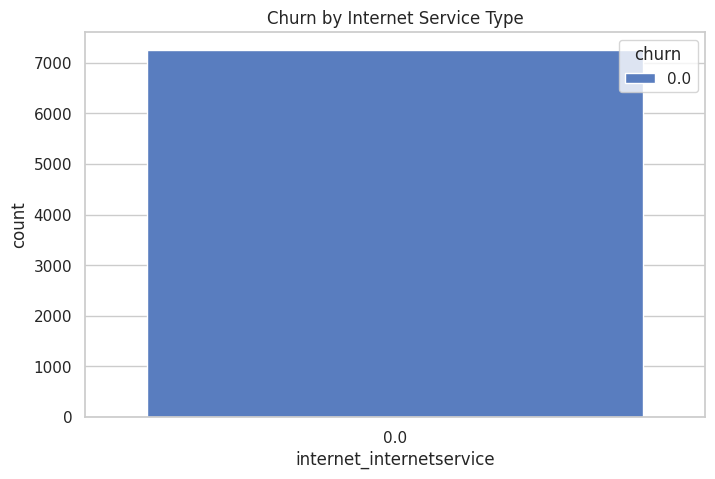

In [102]:
# 2. Internet Services Impact
plt.figure(figsize=(8,5))
sns.countplot(x="internet_internetservice", hue="churn", data=df)
plt.title("Churn by Internet Service Type")
plt.savefig("churn_by_internet_service.png", dpi=300)
plt.show()

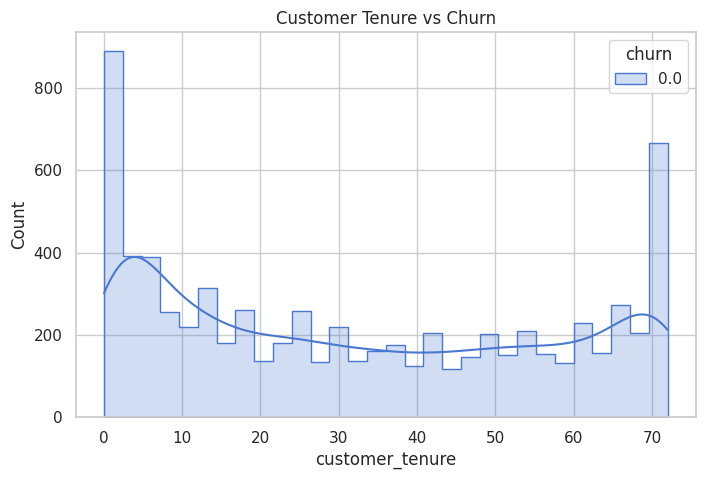

In [103]:
# 3. Tenure vs Churn
plt.figure(figsize=(8,5))
sns.histplot(data=df, x="customer_tenure", hue="churn", bins=30, kde=True, element="step")
plt.title("Customer Tenure vs Churn")
plt.savefig("tenure_vs_churn.png", dpi=300)
plt.show()

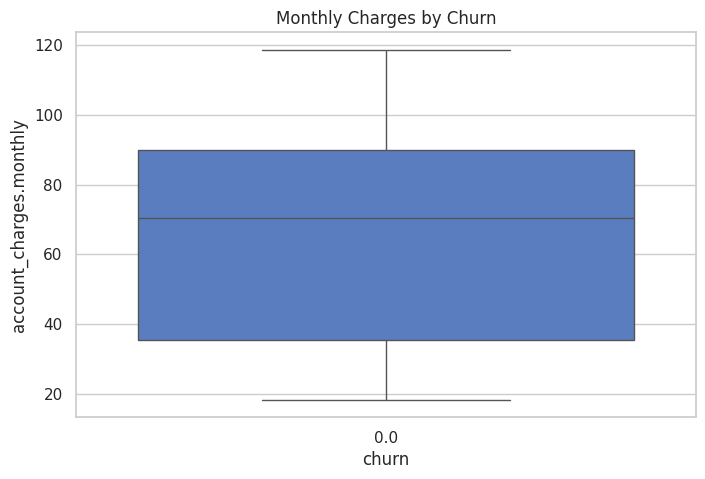

In [104]:
# 4. Monthly Charges vs Churn
plt.figure(figsize=(8,5))
sns.boxplot(x="churn", y="account_charges.monthly", data=df)
plt.title("Monthly Charges by Churn")
plt.savefig("monthly_charges_vs_churn.png", dpi=300)
plt.show()

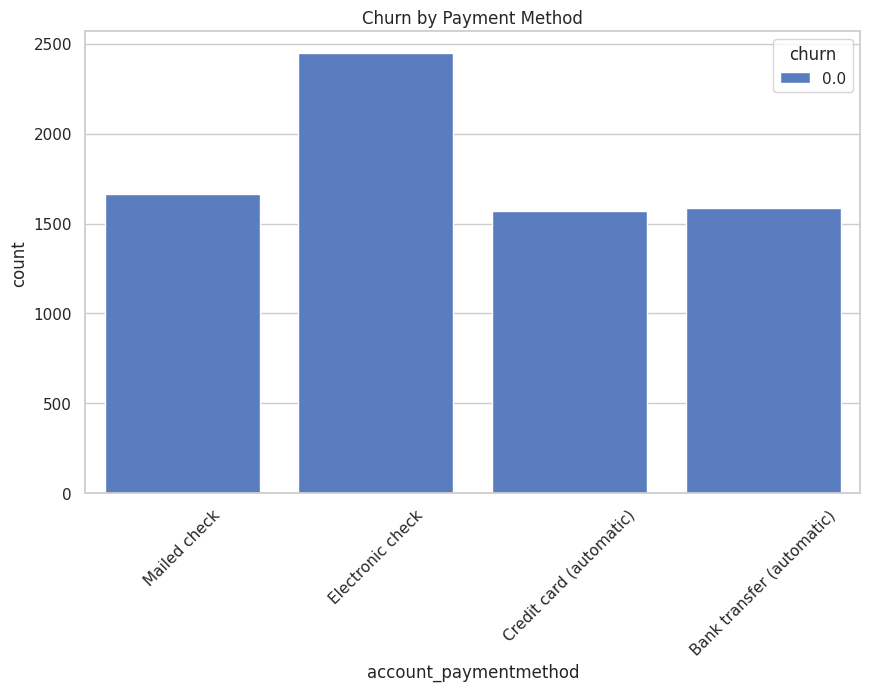

In [105]:
# 5. Payment Methods
plt.figure(figsize=(10,6))
sns.countplot(x="account_paymentmethod", hue="churn", data=df)
plt.xticks(rotation=45)
plt.title("Churn by Payment Method")
plt.savefig("payment_methods_vs_churn.png", dpi=300)
plt.show()

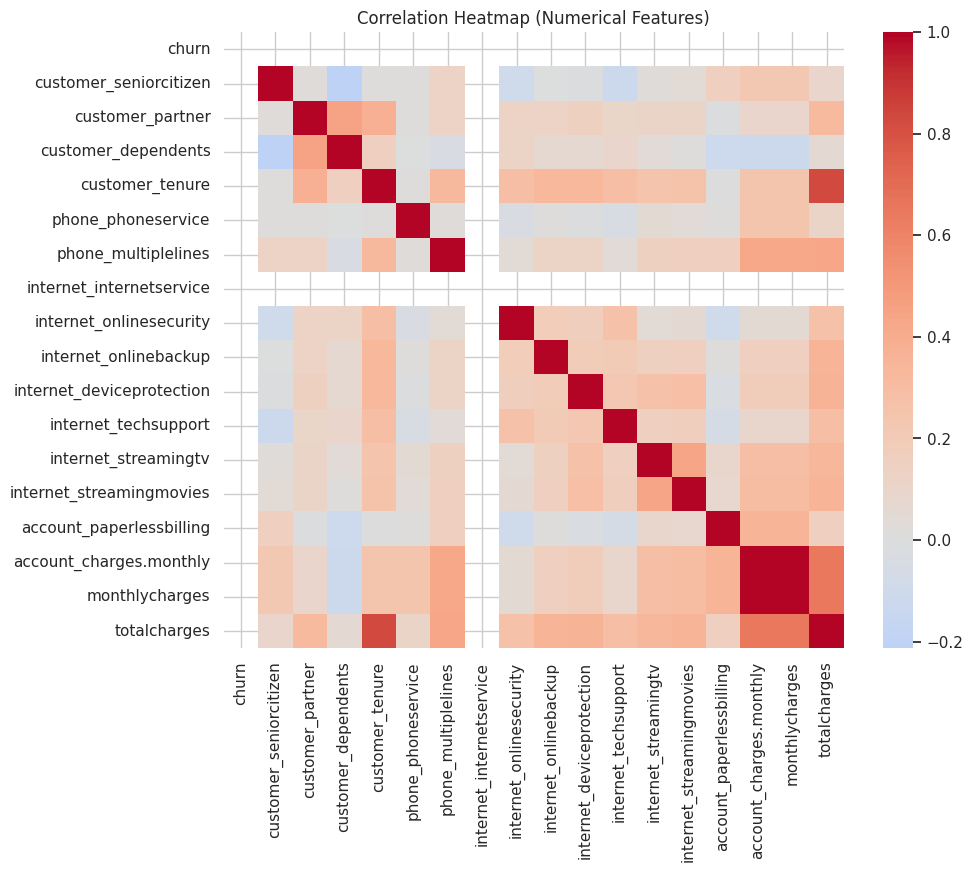

In [106]:
# 6. Correlation Heatmap (numerical features)
plt.figure(figsize=(10,8))
corr = df.corr(numeric_only=True)
sns.heatmap(corr, annot=False, cmap="coolwarm", center=0)
plt.title("Correlation Heatmap (Numerical Features)")
plt.savefig("correlation_heatmap.png", dpi=300)
plt.show()

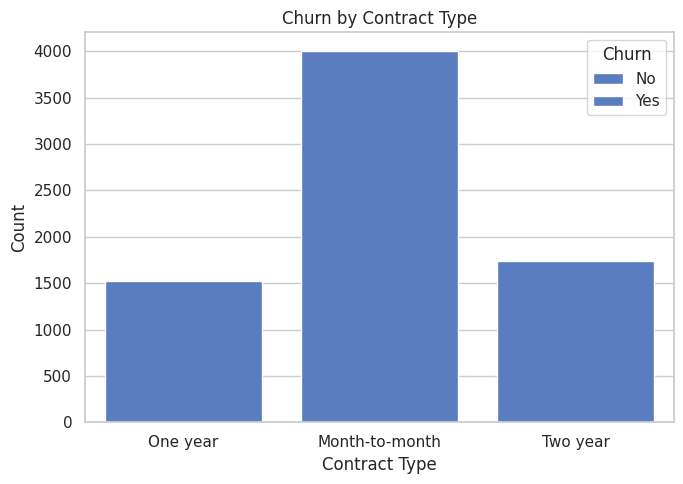

In [107]:
plt.figure(figsize=(7,5))
sns.countplot(x="account_contract", hue="churn", data=df)
plt.title("Churn by Contract Type")
plt.xlabel("Contract Type")
plt.ylabel("Count")
plt.legend(title="Churn", labels=["No", "Yes"])
plt.tight_layout()
plt.show()

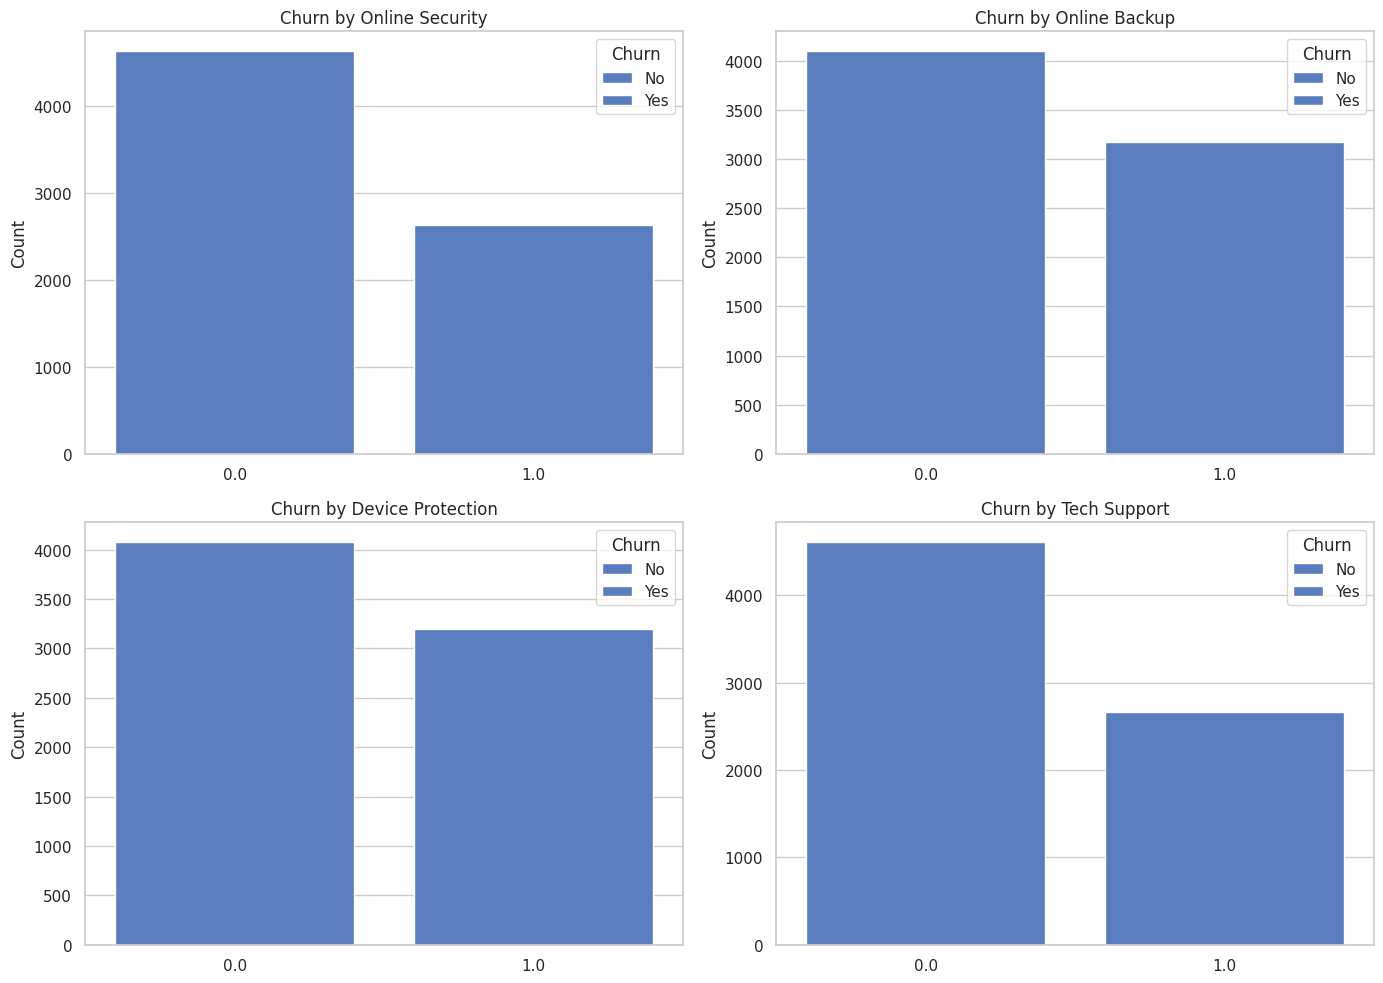

In [108]:
features = [
    ("internet_onlinesecurity", "Churn by Online Security"),
    ("internet_onlinebackup", "Churn by Online Backup"),
    ("internet_deviceprotection", "Churn by Device Protection"),
    ("internet_techsupport", "Churn by Tech Support"),
]

fig, axes = plt.subplots(2, 2, figsize=(14,10))

for ax, (col, title) in zip(axes.flatten(), features):
    sns.countplot(x=col, hue="churn", data=df, ax=ax)
    ax.set_title(title)
    ax.set_xlabel("")
    ax.set_ylabel("Count")
    ax.legend(title="Churn", labels=["No", "Yes"])

plt.tight_layout()
plt.show()


In [112]:
print(df[['account_contract', 'churn']].dropna().head())
print(df['account_contract'].unique())
print(df['churn'].unique())

  account_contract  churn
0         One year    0.0
1   Month-to-month    0.0
2   Month-to-month    0.0
3   Month-to-month    0.0
4   Month-to-month    0.0
['One year' 'Month-to-month' 'Two year']
[0.]
